In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('e.csv')
df

,Date Time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,01-01-2020 01:00,278.08,63.40,989.24,1.24,12.33,0.0,0,0.0,0.0000
1,01-01-2020 02:00,278.29,62.04,989.94,1.00,30.81,0.0,0,0.0,0.4890
2,01-01-2020 03:00,279.06,60.07,990.66,0.88,68.46,0.0,0,0.0,62.5803
3,01-01-2020 04:00,281.46,56.88,991.56,1.20,102.51,0.0,0,0.0,206.2024
4,01-01-2020 05:00,284.02,47.38,992.36,1.73,121.43,0.0,0,0.0,354.7542
...,...,...,...,...,...,...,...,...,...,...
18283,31-01-2022 20:00,283.88,67.04,981.18,2.00,111.63,0.0,0,0.0,0.0000
18284,31-01-2022 21:00,283.53,67.40,980.83,1.84,116.80,0.0,0,0.0,0.0000
18285,31-01-2022 22:00,283.17,67.86,980.47,1.62,121.49,0.0,0,0.0,0.0000
18286,31-01-2022 23:00,283.24,66.33,980.22,1.36,125.17,0.0,0,0.0,0.0000


In [3]:
df.shape

(18288, 10)

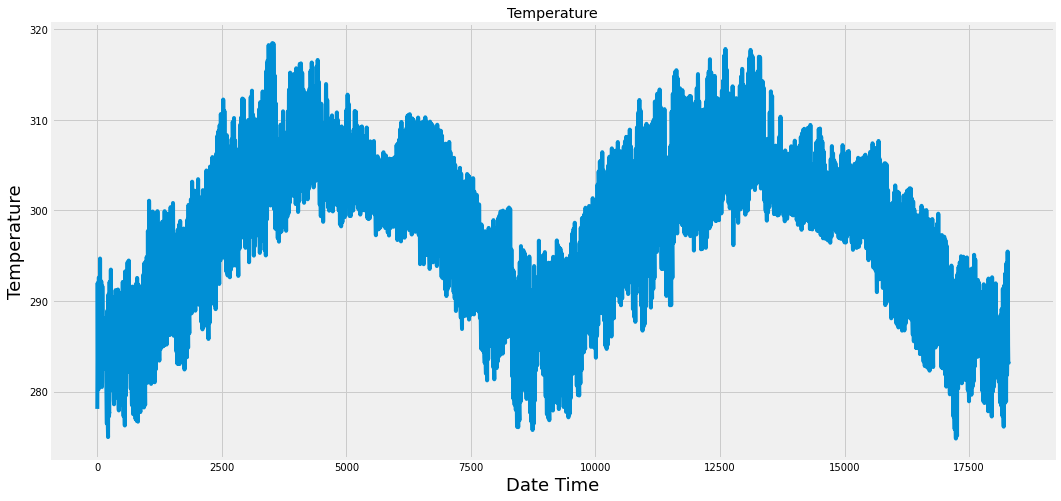

In [4]:
plt.figure(figsize=(16,8))
plt.title('Temperature')
plt.plot(df['Temperature'])
plt.xlabel('Date Time', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.show()

In [5]:
data=df.filter(['Temperature'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

14631

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.07493126],
       [0.07974335],
       [0.09738772],
       ...,
       [0.19156737],
       [0.1931714 ],
       [0.18813016]])

In [8]:
train_data=scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print

[array([0.07493126, 0.07974335, 0.09738772, 0.15238313, 0.21104491,
       0.29193401, 0.3492209 , 0.37832264, 0.39321723, 0.38703025,
       0.34967919, 0.31920257, 0.29926673, 0.26283226, 0.21471127,
       0.17231897, 0.15009166, 0.14046746, 0.1368011 , 0.13978002,
       0.1464253 , 0.15329973, 0.15192484, 0.14459212, 0.13405133,
       0.12442713, 0.13405133, 0.19110907, 0.24472961, 0.31691109,
       0.36778185, 0.39527956, 0.40765353, 0.40490376, 0.38863428,
       0.35426214, 0.3159945 , 0.28780935, 0.26260312, 0.24266728,
       0.22616865, 0.21379468, 0.20669111, 0.2027956 , 0.19958753,
       0.19592117, 0.19248396, 0.18056829, 0.17277727, 0.16269478,
       0.18033914, 0.24725023, 0.32011916, 0.39275894, 0.42850596,
       0.44775435, 0.45531622, 0.4484418 , 0.42323556, 0.34761687])]
[0.29032997250229275]


In [9]:
x_train, y_train=np.array(x_train), np.array(y_train)

In [24]:
x_train=np.reshape(x_train, (x_train.shape[0], 60, 1))
x_train.shape

(14571, 60, 1)

In [15]:
model=Sequential()
model.add(LSTM(5, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=1, epochs=1)

14571/14571 [==============================] - 354s 24ms/step - loss: 0.0019


In [25]:
test_data=scaled_data[training_data_len -60:,:]
x_test = []
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [33]:
x_test=np.array(x_test)

In [34]:
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [35]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [36]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.975524886655195

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


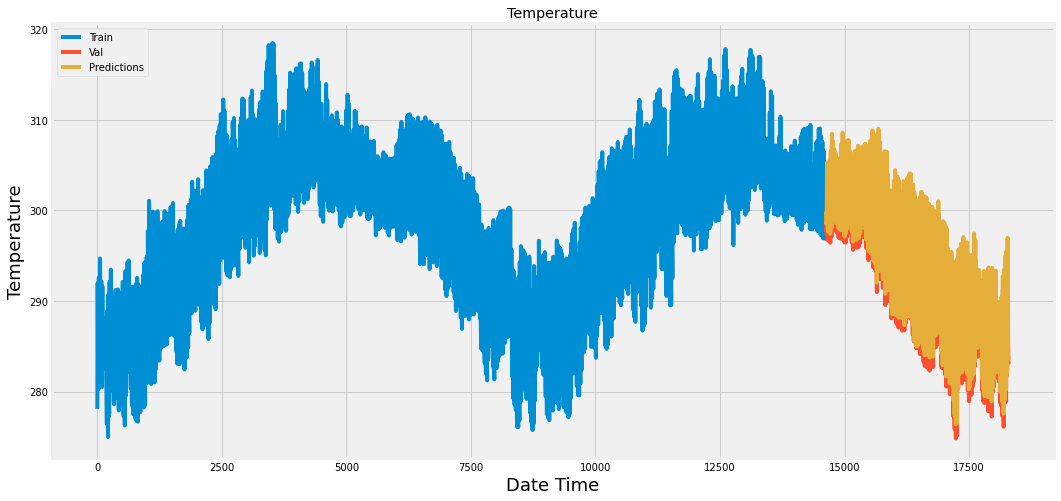

In [42]:
train=data[:training_data_len]
valid =data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16, 8))
plt.title('Temperature')
plt.xlabel('Date Time', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.plot(train['Temperature'])
plt.plot(valid[['Temperature', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()